In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [48]:
df = pd.read_csv('Cleaned_Housing_Data1.csv')

HISTOGRAM

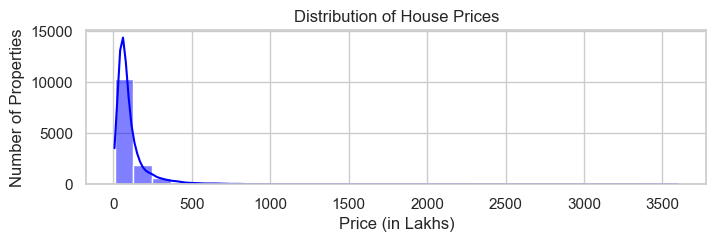

In [88]:
plt.figure(figsize=(8, 2))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Number of Properties')
plt.show()

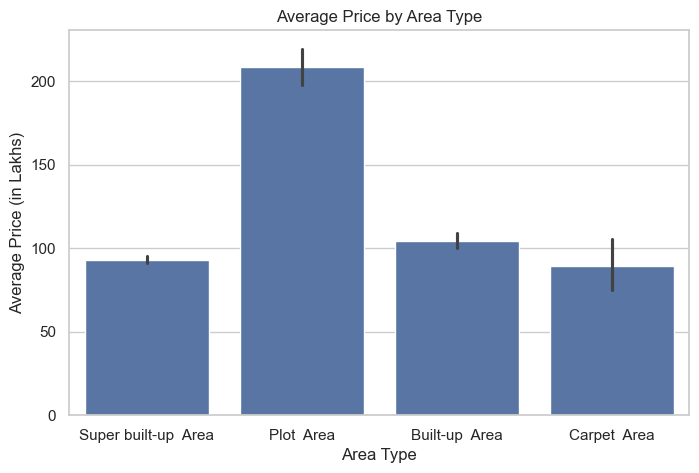

In [86]:
plt.figure(figsize=(8, 5))
sns.barplot(x='area_type', y='price', data=df)
plt.title("Average Price by Area Type")
plt.xlabel("Area Type")
plt.ylabel("Average Price (in Lakhs)")
plt.show()

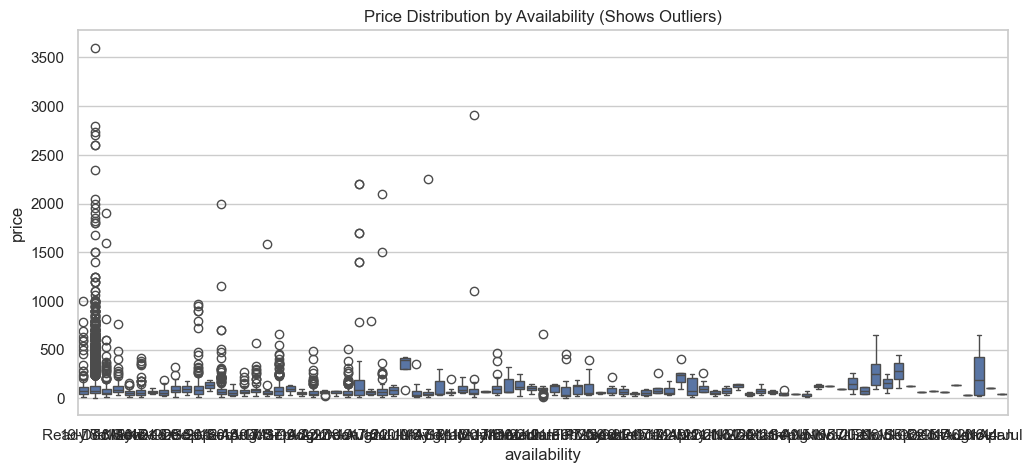

In [57]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='availability', y='price', data=df)
plt.title("Price Distribution by Availability (Shows Outliers)")
plt.show()

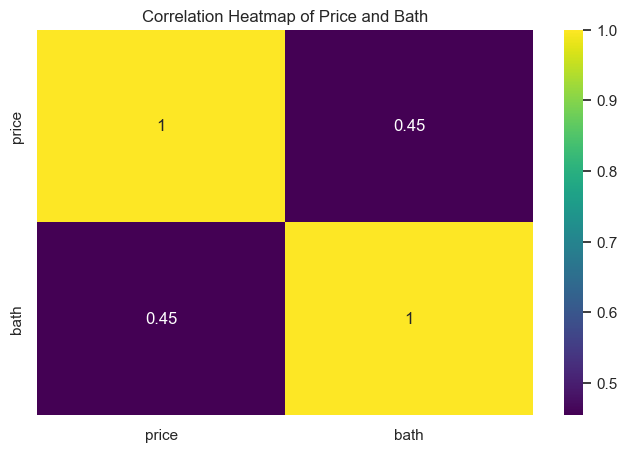

In [67]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['price', 'bath']].corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap of Price and Bath")
plt.show()

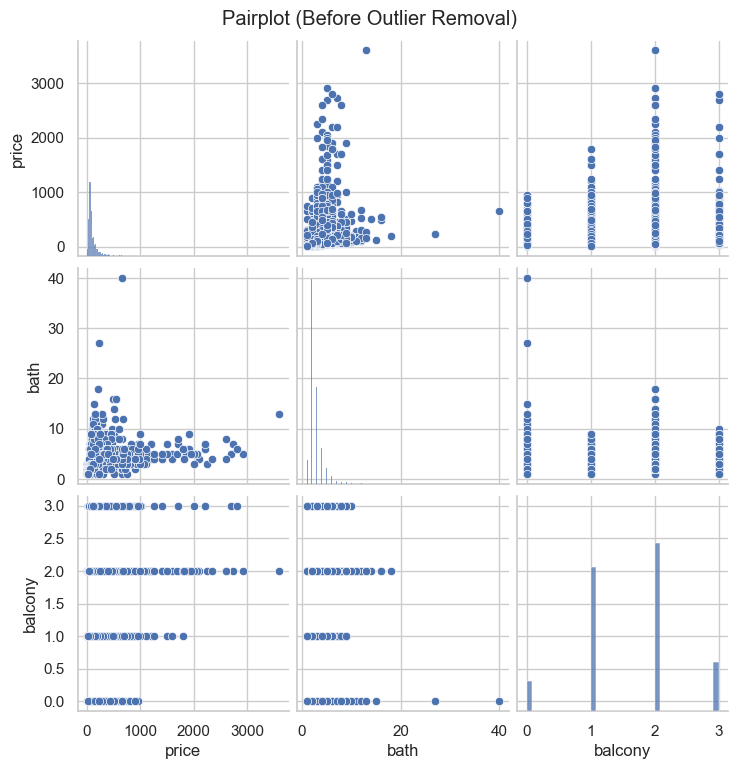

In [73]:
sns.pairplot(df[['price',  'bath', 'balcony']])
plt.suptitle("Pairplot (Before Outlier Removal)", y=1.02)
plt.show()

/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_6467/2640889070.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='price', shade=True, color='red')


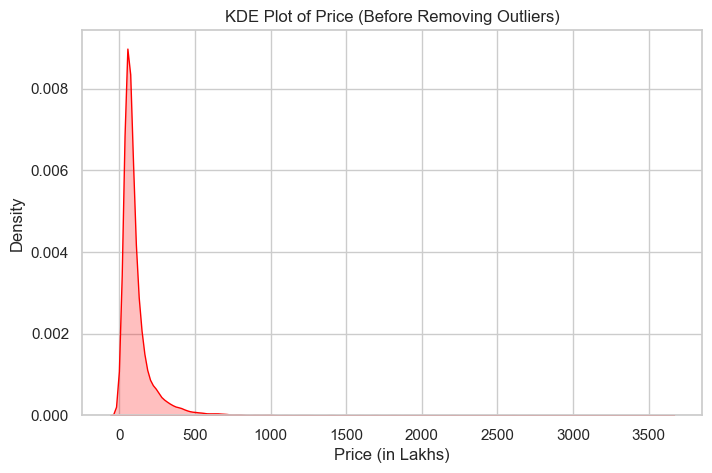

In [75]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='price', shade=True, color='red')
plt.title("KDE Plot of Price (Before Removing Outliers)")
plt.xlabel("Price (in Lakhs)")
plt.ylabel("Density")
plt.show()

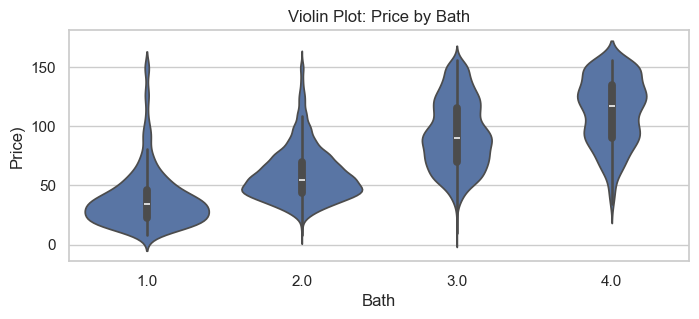

In [118]:
plt.figure(figsize=(8, 3))
sns.violinplot(x='bath', y='price', data=df)
plt.title("Violin Plot: Price by Bath")
plt.xlabel("Bath")
plt.ylabel("Price)")
plt.show()

galti se outliers hatane ke baad rerun ho gaya, hence the graph is the one which will appear post-outliers, did it in vsc so dk how to redo it without removing the outlier fn

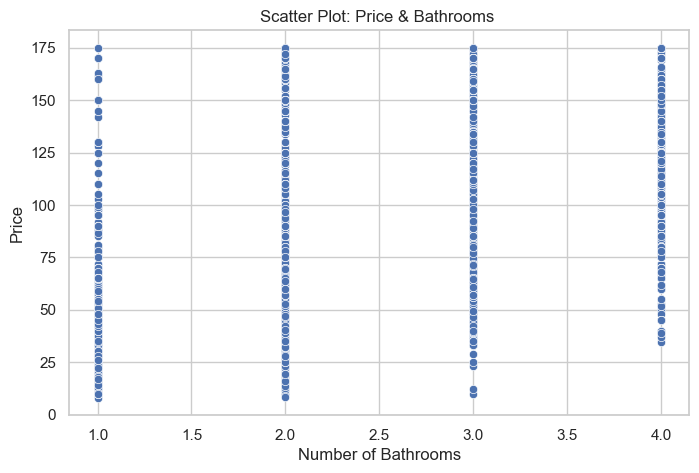

In [116]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bath', y='price', data=df)
plt.title("Scatter Plot: Price & Bathrooms ")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.show()

OUTLIER REMOVAL : 

In [121]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [122]:
df = remove_outliers(df, 'price')
df = remove_outliers(df, 'bath')
df = remove_outliers(df, 'balcony')

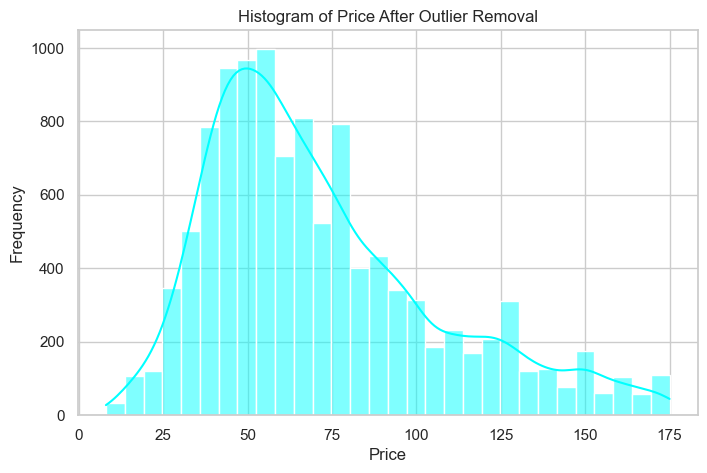

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color='cyan')
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

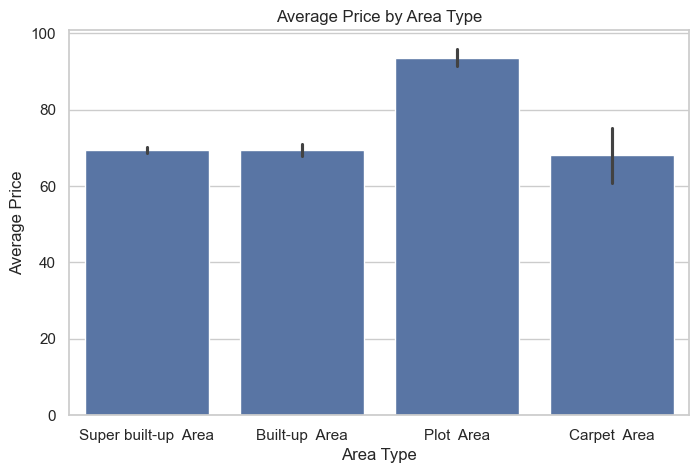

In [104]:
plt.figure(figsize=(8, 5))
sns.barplot(x='area_type', y='price', data=df)
plt.title("Average Price by Area Type")
plt.xlabel("Area Type")
plt.ylabel("Average Price")
plt.show()

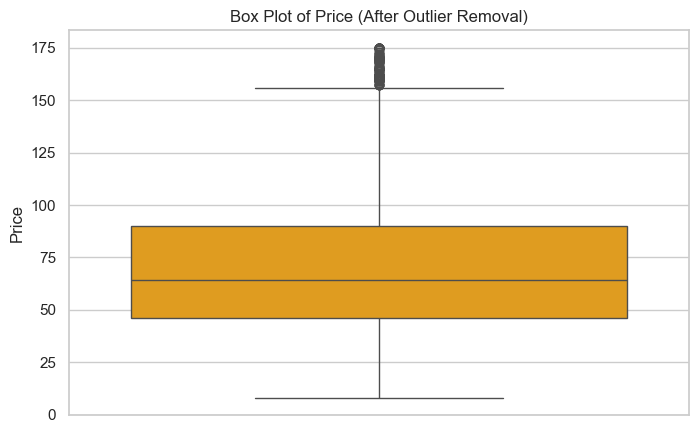

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='price', data=df, color='orange')
plt.title("Box Plot of Price ")
plt.ylabel("Price")
plt.show()

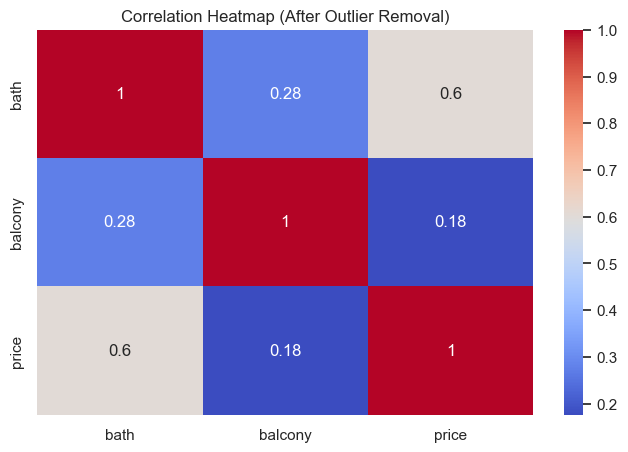

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

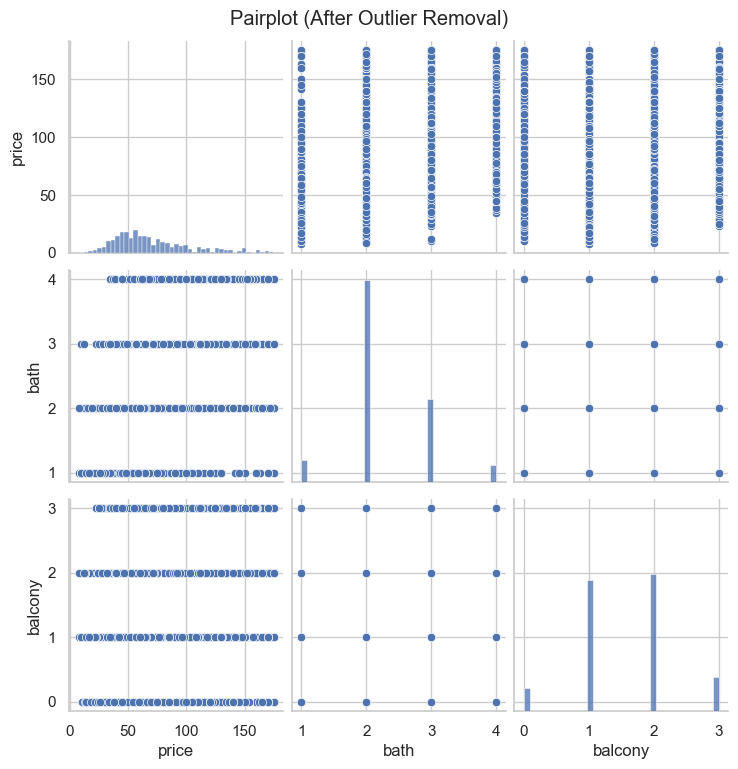

In [ ]:
sns.pairplot(df[['price', 'bath', 'balcony']])
plt.suptitle("Pairplot", y=1.02)
plt.show()

/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_6467/3867865639.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True, color='purple')


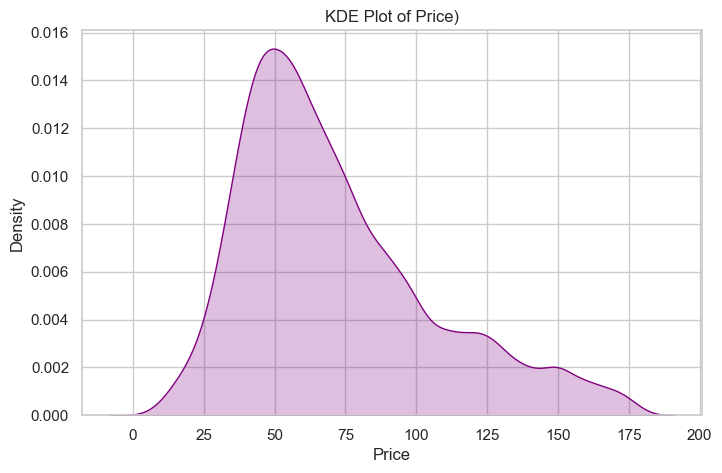

In [112]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['price'], shade=True, color='purple')
plt.title("KDE Plot of Price)")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

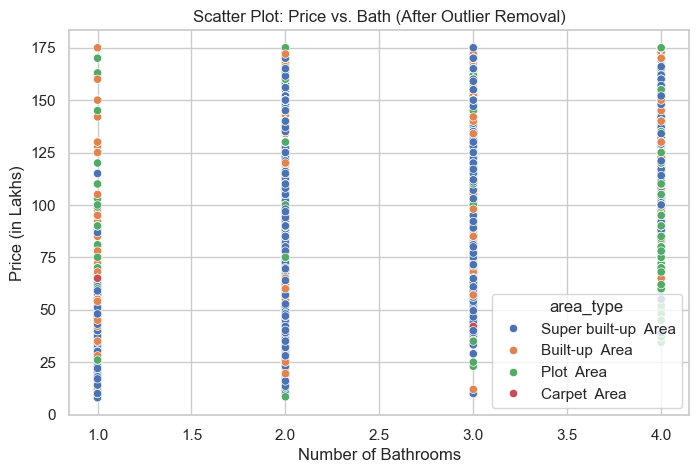

In [113]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bath', y='price', data=df, hue='area_type')
plt.title("Scatter Plot: Price vs. Bath (After Outlier Removal)")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price (in Lakhs)")
plt.show()

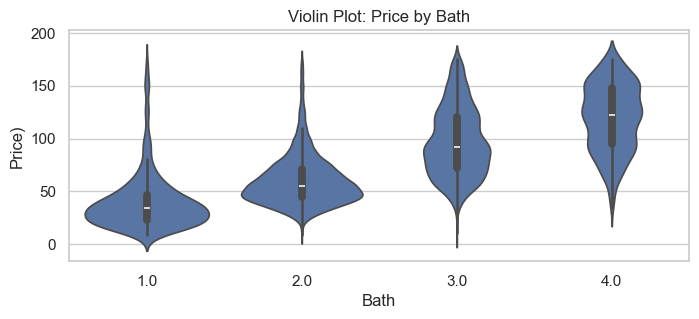

In [114]:
plt.figure(figsize=(8, 3))
sns.violinplot(x='bath', y='price', data=df)
plt.title("Violin Plot: Price by Bath")
plt.xlabel("Bath")
plt.ylabel("Price)")
plt.show()

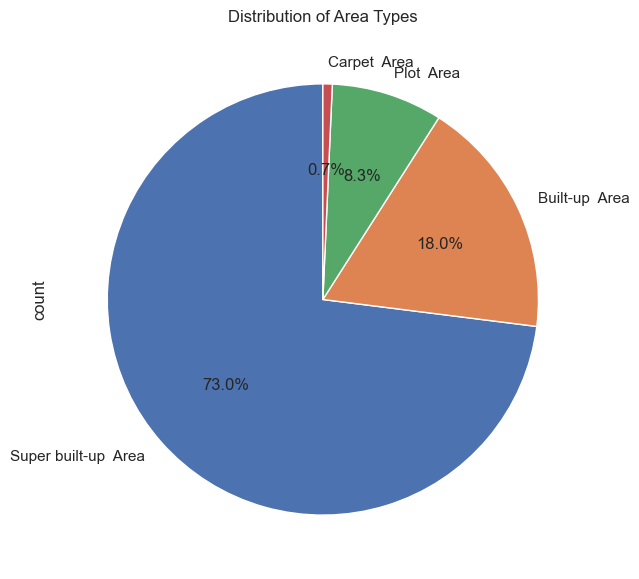

In [131]:
# After REMOVING the OUTLIERS, so data is clean...
plt.figure(figsize=(7,7))
df['area_type'].value_counts().plot(kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribution of Area Types")
plt.show()